# Crowdedness Visualizations
Contains Data Exploration for the crowdedness sensor data

## Imports

In [2]:
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Import Files

In [3]:
#Full Crowdedness Dataset
crowd_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Crowdedness.csv")

crowd_df.head()

,Sensor,Date,Hour,SensorLongitude,SensorLatitude,CrowdednessCount
0,GAWW-01,2018-03-11,100,4.899847,52.374601,3133
1,GAWW-01,2018-03-11,200,4.899847,52.374601,2120
2,GAWW-01,2018-03-11,300,4.899847,52.374601,1419
3,GAWW-01,2018-03-11,400,4.899847,52.374601,1085
4,GAWW-01,2018-03-11,500,4.899847,52.374601,498


## Visualizations

### Camera Counts

#### Sensor GAWW-01

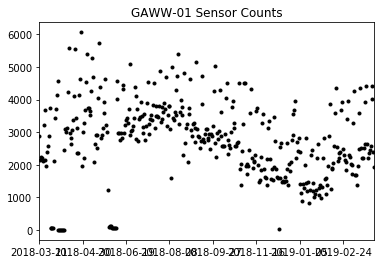

In [6]:
counts_gaww01 = crowd_df[crowd_df["Sensor"] == "GAWW-01"]

#Select usable columns plot
counts_gaww01 = counts_gaww01[["Date", "CrowdednessCount"]].reset_index()

#Remove Index column
counts_gaww01 = counts_gaww01.drop(columns=["index"])

#Df to dict
counts_gaww01_dict = counts_gaww01.to_dict("index")

#Dict that the series will be based on 
counts_gaww01_series_dict = {}

#Loop dict and save date:count to new dict
for k, v in counts_gaww01_dict.items():
    counts_gaww01_series_dict[v["Date"]] = v["CrowdednessCount"]
    
#Transform dict to Pandas Series
counts_gaww01_series = pd.Series(counts_gaww01_series_dict)

#plot the series
counts_gaww01_series.plot(style='k.', title="GAWW-01 Sensor Counts")
plt.show()

#### Sensor GAWW-02

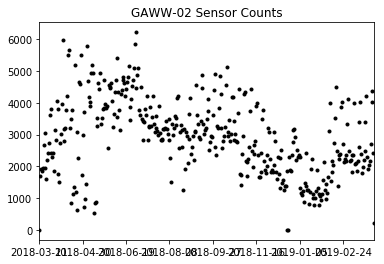

In [4]:
counts_gaww02 = crowd_df[crowd_df["Sensor"] == "GAWW-02"]

#Select usable columns plot
counts_gaww02 = counts_gaww02[["Date", "CrowdednessCount"]].reset_index()

#Remove Index column
counts_gaww02 = counts_gaww02.drop(columns=["index"])

#Df to dict
counts_gaww02_dict = counts_gaww02.to_dict("index")

#Dict that the series will be based on 
counts_gaww02_series_dict = {}

#Loop dict and save date:count to new dict
for k, v in counts_gaww02_dict.items():
    counts_gaww02_series_dict[v["Date"]] = v["CrowdednessCount"]
    
#Transform dict to Pandas Series
counts_gaww02_series = pd.Series(counts_gaww02_series_dict)

#plot the series
counts_gaww02_series.plot(style='k.', title="GAWW-02 Sensor Counts")
plt.show()

#### Sensor GAWW-03

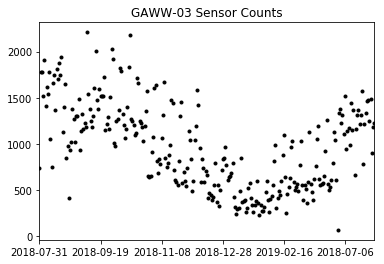

In [19]:
counts_gaww03 = crowd_df[crowd_df["Sensor"] == "GAWW-03"]

#Select usable columns plot
counts_gaww03 = counts_gaww03[["Date", "CrowdednessCount"]].reset_index()

#Remove Index column
counts_gaww03 = counts_gaww03.drop(columns=["index"])

#Df to dict
counts_gaww03_dict = counts_gaww03.to_dict("index")

#Dict that the series will be based on 
counts_gaww03_series_dict = {}

#Loop dict and save date:count to new dict
for k, v in counts_gaww03_dict.items():
    counts_gaww03_series_dict[v["Date"]] = v["CrowdednessCount"]
    
#Transform dict to Pandas Series
counts_gaww03_series = pd.Series(counts_gaww03_series_dict)

#plot the series
counts_gaww03_series.plot(style='k.', title="GAWW-03 Sensor Counts")
plt.show()

#### GAWW-04

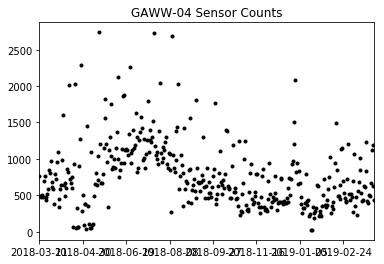

In [5]:
counts_gaww04 = crowd_df[crowd_df["Sensor"] == "GAWW-04"]

#Select usable columns plot
counts_gaww04 = counts_gaww04[["Date", "CrowdednessCount"]].reset_index()

#Remove Index column
counts_gaww04 = counts_gaww04.drop(columns=["index"])

#Df to dict
counts_gaww04_dict = counts_gaww04.to_dict("index")

#Dict that the series will be based on 
counts_gaww04_series_dict = {}

#Loop dict and save date:count to new dict
for k, v in counts_gaww04_dict.items():
    counts_gaww04_series_dict[v["Date"]] = v["CrowdednessCount"]
    
#Transform dict to Pandas Series
counts_gaww04_series = pd.Series(counts_gaww04_series_dict)

#plot the series
counts_gaww04_series.plot(style='k.', title="GAWW-04 Sensor Counts")
plt.show()